# Machine Learning - Digit Example

Scikit-learn ist eine freie Software-Bibliothek zum maschinellen Lernen für die Programmiersprache Python. Diese Bibliothek bringt bereits verschiedene Daten zum Trainieren eines neuroanlen Netzes mit. 
Im folgenden Beispiel werden wir ein neuronales Netz mit handschriftlichen Zahlen trainieren und eigene Bilder durch unser neuronales Netz prüfen lassen.

## Einlesen der Beispiel Daten

Um die Beispiel Daten nutzen zukönnen, müssen wir die entsprechende Bibliothek **"datasets"** importieren. Anschließend können wir die Daten über die Methode **"load_digits()"** importieren

In [3]:
from sklearn import datasets

In [4]:
zahlen = datasets.load_digits()

## Ausgabe der Beispiel Daten

In der Variable **zahlen** sind jetzt ca. 1800 handschriftliche Ziffern mit der Information über die tatsächliche Zahl gespeichert.

* **zahlen.images[]** : Beinhaltet die handschriftlichen Ziffern in Form von Bildern.
* **zahlen.data[]** : Beinhaltet die handschriftlichen Ziffern in einer für unser neuronales Netz erforderlichen Form.
* **zahlen.target[]** : Beinhaltet den zu den handschritlichen Ziffern korrekten Wert.


Für die Ausgabe der handschriftlichen Ziffern als Bild kann die Bibliothek "matplotlib" verwendet werden. Diese importieren wir mit import mit einem Synonym (as plt)

In [2]:
from matplotlib import pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Anschließend können wir z.B. die ersten 64 Ziffern mit deren Bedeutung über die folgenden Code-Zeilen ausgeben.

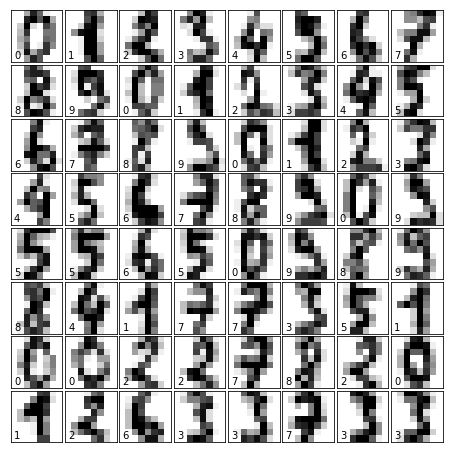

In [15]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(zahlen.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(zahlen.target[i]))

Genaus so ist es auch möglich nur einzelne Ziffern aus der variable **zahlen** auszugeben. Hierfür nutzen wir einen Index (beginnt bei 0) in []-Klammern.

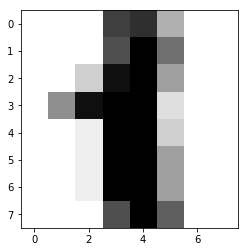

In [5]:
plt.imshow(zahlen.images[1], cmap=plt.cm.gray_r)
plt.show()

Auch wenn für uns Menschen die tatsächliche Ziffer bereits bekannt ist, können wir zur Kontrolle auch die im Datensatz hinterlegte Ziffer prüfen.

In [6]:
print(zahlen.target[1])

1


### Aufgabe: Gebe das dritte und 13. Bild wie oben aus.

In [ ]:
# Ausgabe

##  Das neuronale Netz

Das von uns trainierte neuronale Netz basiert auf der Bibilothek **scikit-learn**.

In [7]:
from sklearn.svm import SVC

Nachdem wir uns ein leeres neuronales Netz über die Methode **SVC** erzeugt haben, können wir dieses mit Hilfe des Befehls **fit()** und unseren Beispieldaten trainieren.

In [8]:
neuronales_netz = SVC(gamma=0.001)
neuronales_netz.fit(zahlen.data, zahlen.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testen

Nach dem wir unser neuronales Netz trainiert haben, können wir Bilder auf die jeweilige Ziffer prüfen lassen (**predict**). Hierfür können wir zunächst Bilder aus unseren Beispiel Daten nehmen.

Aus unseren obigen Ergebnissen wissen wir, dass das Bild **zahlen.data[2]** die Ziffer **2** darstellt. Für die Prüfung durch unser neuronales Netz müssen wir die Daten der Bilder zunächst mit dem Befehl **reshape()** umwandeln. Die umgewandelten Bilder speichern wir in der Variable **img**.

In [10]:
n_samples = len(zahlen.images)
img = zahlen.images.reshape((n_samples,-1))
neuronales_netz.predict([img[2]])

array([2])

Auch eigene Bilder können gegen unser neuronales Netz getestet werden. Im Verzeichnis liegen hierzu bereits die Bilder *1.png*, *5.jpg* und *8.jpg*. Weitere Bilder können auch hochgeladen werden. Der Dateiname wird in der Variable **filename** hinterlegt.

In [15]:
from skimage.io import imread
from skimage.exposure import rescale_intensity
from skimage.transform import resize

filename = "3.png"
img = resize(imread(filename), (8,8))
img = rescale_intensity(img, out_range=(0, 16))

x_test = [sum(pixel)/3.0 for row in img for pixel in row]
print("The predicted digit is {}".format(neuronales_netz.predict([x_test])))

The predicted digit is [9]


Möglicherweise stellen wir bei Test mit eigenen Bildern fest, dass das Ergebnis nicht stimmt. Dies hat mehrere Ursachen:
* Die Anzahl an Trainings-Daten ist mit 1797 relativ gering
* Die geringe Auflösung der Bilder von 8x8 Pixel führt schnell dazu, dass "falsche" Pixel interpretiert werden.

Zur Prüfung, wie unsere eigenen Bilder mit 8x8 Pixel aussehen, können wir diese mit der Bibilothek "matplotlib" anzeigen.

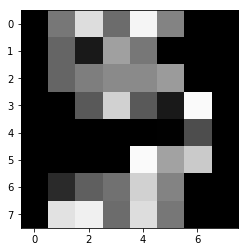

In [25]:
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()